# Continuous System Equivalence

## Introduction

In many cases, e.g. signal processing, control systems, etc., we want to
design a digital system so that it behaves (dynamically and in
steady-state) the same as a continuous system. A digital system that has
the same input-behaviour as a (sampled) continuous system is called a
*continuous equivalent*.

## Agenda

In the pre-lecture presentation we will start by discussing the
relationship of $s$ to $z$. We will then present four ways to convert a
transfer function $H(s)$ into its digital equivalent $H(z)$. These are:

-   The zero-order hold equivalent

-   The Tustin bilinear transform equivalent

-   Matched pole zero equivalent

-   Modified matched pole-zero equivalent

## Examples

Will be done in class

Before we can describe what we might mean by a continuous equivalent system, it is necessary to establish the
relationship between digital operations, such as the shift, and
continuous operations.

## Equivalence of s and z

### Sampling a Delayed Signal

Consider a simple operation of sampling with a delay

![fig 1](pictures/cse1.png)

This can be represented in transform as

![fig 2](pictures/cse2.png)

### Delaying a Sampled Signal 

The same result could be obtained by delaying the continuous signal and then sampling.

![fig 3](pictures/cse3.png)

Which can be represented in transform as

![fig 4](pictures/cse4.png)

### Relationship of z to s

From the preceding arguments 

$$\begin{equation}
z^{-1} = e^{-sT}
\end{equation}$$ 
    

That is $$\begin{equation}
    z=e^{sT}\end{equation}$$ 
    

or $$\begin{equation}
  s=\frac{1}{T}\ln z\end{equation}$$

This is the fundamental relationship of equivalence. Before using it, we
must see how a continuous signal is reconstructed from a digital signal.
This is accomplished by means of a "*Digital-to-Analogue Converter*"

## Digital-to-Analogue Converter

### Modelling a DAC with a Zero-Order Hold

The simplest converter is a "*Zero-Order Hold*" (see Fig. 1). This acts the opposite way to a sampler.

![Zero-Order Hold](pictures/zoh.png)
**Figure 1: zero-order Hold**

### Operation of the Zero-order Hold

During each sample period, the device holds
the output $v(t)$ constant at the current value of the digital signal
$v_k$.

 That is $$\begin{equation}
  v(t) = v_k\ \mathrm{for}\ kT \le t < (k+1)T\end{equation}$$ 

This generates a
stepwise continuous signal $v(t)$ which at the sampling instants is
equal to the continuous signal from which the digital signal ${v_k}$ was
generated.

The signal may be considered as an infinite number of pulses of which
the $k$-th is that shown in the next slide. 

### Modelling the ZOH Mathematically

#### Step-wise continuous signal

This represents the output of the zero-order hold $v(t) = v_k$ for $kT \le t < (k+1)T$.

![Pulse](pictures/pulse.png)

To model such a signal we use the
so-called "*gating*" property of the time-delayed unit-step function
$\epsilon(t)$ illustrated in the next slide.

#### The Gating Function

![Gating function](pictures/gate.png)

The opening "gate" is given by $v_k \epsilon (t-kT)$, a step of height
$v_k$, which is activated at $t=kT$ seconds. The gate is "closed" by a
negative going unit step, also of height $v_k$, which is activated at
$t=\{k+1\}T$ seconds.

The sum of these two signals is $$\begin{eqnarray*}
  p(t) &=& v_k \epsilon(t - kT) - v_k \epsilon(t - \{k+1\}T)\\
       &=& v_k\left[\epsilon(t - kT) - \epsilon(t - \{k+1\}T)\right]\end{eqnarray*}$$

So for the sequence: $$\begin{equation}
  v(t) = \sum_{k=0}^{\infty} v_k\left[\epsilon(t - kT) - \epsilon(t - \{k+1\}T)\right]\end{equation}$$

In transform form this is $$\begin{eqnarray*}
  V(s) &=& \sum_{k=0}^{\infty} v_k\left(\frac{1}{s}e^{-kTs} -
  \frac{1}{s}e^{-\left\{k+1\right\}Ts}\right)\\
       &=& \frac{1}{s}\left(1-e^{-Ts}\right) \sum_{k=0}^{\infty} v_k
  e^{-kTs}\\
       &=& \frac{1}{s}\left(1-z^{-1}\right) \sum_{k=0}^{\infty} v_k
  z^{-k}\\
       &=& \frac{1}{s}\,\frac{z-1}{z}\,V(z)\end{eqnarray*}$$

So the zero-order hold is represented by the mixed transfer function
$$\begin{equation}
  G_{\mathrm{zoh}}=\frac{1}{s}\,\frac{z-1}{z}\end{equation}$$ as shown in
Fig. 2.

![Transfer Function of the Zero-Order Hold](pictures/zohtf.png)
**Figure 2: Transfer Function of the Zero-Order Hold**

We can now design a 'hold-equivalent' digital system.

#### Hold-Equivalent Digital System

![Hold-Equivalent Digital System](pictures/holdequiv.png)

From the diagram in the previous slide. 

$$\begin{eqnarray*}
  Y(z) &=& H(z) U(z)\\
  Y(z) &=& \mathcal{Z} Y(s)\\
       &=& \mathcal{Z} \frac{1}{s} H(s) \frac{z-1}{z} U(z)\end{eqnarray*}$$

so $$\begin{equation}
  H(z) = \frac{z-1}{z} \mathcal{Z} \frac{H(s)}{s}\end{equation}$$

#### Example 1

If

$$H(s) = \frac{a}{s+a}$$ 

then find the Zero-Order Hold Equivalent $H(z)$

##### Solution

$$\begin{eqnarray*}
  H(z) &=& \frac{z-1}{z}\mathcal{Z} \frac{a}{s(s+a)}\\
       &=& \frac{z-1}{z} \frac{z(1-e^{-aT})}{(z-1)(z-e^{-aT})}\\
       &=& \frac{1-e^{-aT}}{z-e^{-aT}}.\end{eqnarray*}$$

**Malab note**: the zero-order-hold equivalent is the default system
used for continuous system equivalence in *MATLAB*. To convert a
continous system in any *lti* format<sup>1</sup> use:

    lti_d = c2d(lti, Ts); % You must provide a sampling time or use -1 if undefined

## Other Continuous System Equivalences 

### Approximation based on numerical integration

An alternative approach is to use the relationship 

$$s  = \frac{1}{T}
\ln z.$$ 

This cannot be substituted into a transfer function directly as
the result is not rational, but an approximation may be used.

#### Approximation by Numerical Integration

We wish to find a transfer function $T(z)$ that is equivalent to $T(s)=s$.

Let us instead seek a transfer function $D(z)$ that is equivalent to $D(s) = 1/s$.

![s-to-z](pictures/s-to-z.png)

Thus, the transfer function we are seeking will in fact be an approximation of the integral $y(t)=\int u(t) dt$. We can illustrate this as shown in the next slide. 

#### Model of Integration

![integral1](pictures/integral1.png)

If we sample the curve $u(t)$ and consider the situation at the $n$-th sampling instant, we will have 

$$y(nT) = \int_{0}^{nT} u(t) dt$$

We can rewrite this as $$y(nT)= \int_{0}^{nT-T} u(t) dt + \int_{nT-T}^{nT} u(t) dt$$

where the second integral term is the shaded area shown in the next slide,

#### Sampled Model of Integration

![integral2](pictures/integral2.png)

Now if we assume that the first integral term was approximated by the digital integrator in the previous sampling
instant, then $y(nT-T) = \int_{0}^{nT-T} u(t) dt$ is known, and consequently we have 

$$y(nT) = y(nT-T) + \int_{nT-T}^{nT} u(t) dt$$

and we only need to determine the area of the shaded region to approximate $y(nT)$.

The most obvious approximations are illustrated in the next three slides. 

#### Forward Rectangular Approximation

![backward rectangular approxation](pictures/backward-rect.png)

#### Backward Rectangular Approximation

![Forward rectangular approximation](pictures/forward-rect.png)

#### Trapezoidal Approximation

![Trapezoidal approximation](pictures/trapezoidal.png)

It is clear that if we are to disallow any further subdivision of the shaded area, the *trapezoidal approximation* will provide the most accurate result.

#### z-transform of trapezoidal approximation

Completing the analysis, we can show that

$$y(nT)\approx y(nT-T) + \frac{T}{2}\{u(nT-T)+u(T)\}$$

which on taking z-transforms gives 

$$Y(z)=z^{-1}Y(z)+\frac{T}{2}\{z^{-1}U(z)+U(z)\}$$

thus


$$\frac{Y(z)}{U(z)}=D(z)=\frac{T}{2}\left\{ {\frac{1 + {z^{ - 1}}}{1 - {z^{ - 1}}}} \right\}.$$


#### Approximation of s by numerical integration

By comparison with continuous integration $Y(s)/U(s)=1/s$, this result, obtained by *numerical integration* allows us to say that 

$$s \approx \frac{2}{T}\left\{\frac{1-z^{-1}}{1+z^{-1}}\right\}.$$ 

These results are summarised in the next few slides.

### Summary of Numerical Integration Methods

#### Trapezoidal approximation

$$\begin{eqnarray*}
     s &=& \frac{2}{T}\, \frac{z-1}{z+1} \\
     z &=& \frac{1 + 1/2 sT}{1 - 1/2 sT}
  \end{eqnarray*}$$

compare expansion

$$z=(1+ (1/2) sT)(1- (1/2) sT)^{-1} = 1 + sT + (1/2) s^2T^2 + (1/4) s^3T^3 + \cdots$$ 

with

$$z = e^{sT} = 1 + sT + (1/2) s^2T^2 + (1/6) s^3T^3 + \cdots$$

This approximation is known as "*Tustin's Bilinear Transformation*".

#### Forward rectangular approximation

$$\begin{aligned}
     s &=& \frac{z-1}{T} \\
     z &=& 1 + sT
  \end{aligned}$$ 
  

compare with

$$z = e^{sT} = 1 + sT + (1/2) s^2T^2 + (1/6) s^3T^3 + \cdots$$

#### Backward rectangular approximation

$$\begin{aligned}
     s &=& \frac{z-1}{Tz} \\
     z &=& \frac{1}{1 + sT}
  \end{aligned}$$ 
  

compare expansion

$$z=(1-sT)^{-1} = 1 + sT + s^2T^2 + s^3T^3 + \cdots$$ 

with

$$z = e^{sT} = 1 + sT + (1/2) s^2T^2 + (1/6) s^3T^3 + \cdots$$

### Example 2 

If

$$H(s) = \frac{a}{s+a},$$ 

determine the equivalent $H(z)$ using Tustin's bilinear transformation.

#### Solution

Tustin's bilinear transformation gives a digital system with transfer
function 

$$\begin{eqnarray*}
   H(z)&=& \frac{a}{\frac{2}{T}\,\frac{z-1}{z+1}+a} \\
       &=& \frac{\left(\frac{(aT)/2}{1+(aT)/2}\right)(z+1)}{z-\left(\frac{1-(aT)/2}{1+(aT)/2}\right)}.
 \end{eqnarray*}$$

**Malab note**: the bilinear transform equivalent is obtained by passing
the argument `'tustin'` to the *c2d* method:

    lti_d = c2d(lti, Ts, 'tustin');

### Matched pole-zero approximations 

Another way to obtain a digital approximation of a continuous transfer function is to use the relationship $z = e^{sT}$ to map poles and zeros of the continuous transfer function into poles and zeros in the z-transfer function.

Since continuous transfer functions often have more poles than zeros, that is $n-m$ zeros at infinity, zeros at infinity are replaced in the z-transfer function by zeros at $z = -1$ which is equivalent to half the sampling frequency $\omega_s/2$ (i.e. the highest frequency possible in the z-domain). Thus if $n-m =1$ we add $(1+z^{-1})$, if $n-m=2$, $(1+z^{-1})^2$, etc.

####  Matched-Pole Zero method

Idea is that all poles and zeros of continuous transfer function $D(s)$ can become poles and zeros of digital transfer function $D(z)$ if the mapping $z=e^{sT}$ is used.

Method:

1.  Map finite poles and zeros of $D(s)$ to poles and zeros of $D(z)$
    according to $z=e^{sT}$.

2.  Add zeros at $z=-1$ for each infinite zero in $D(s)$.

3.  Match DC or low-frequency gain.

#### Example 3

Use the Matched-Pole-Zero (MPZ) approximation to give the z-transfer function equivalent to 

$$D(s)=\frac{s+a}{s+b}.$$

##### Solution 

Order of numerator and denominator are equal so there are no infinite
zeros and by matching poles and zeros

$$D(z)=k\left(\frac{1-e^{-aT}z^{-1}}{1 - e^{-bT}z^{-1}}\right).$$

For $D(s)$ the DC gain is $D(s)|_{s=0} = a/b$. 

The DC gain for $D(z)$ is 

$$\left.D(z)\right|_{z=1}$$ 

(from final value theorem) that is

$$k\left(\frac{1-e^{-aT}}{1-e^{-bT}}\right) = \frac{a}{b}.$$

We choose $k$ so that the DC gains match, i.e. 

$$k=\frac{a}{b}\left(\frac{1-e^{-bT}}{1-e^{-aT}}\right).$$

#### Example 4

Use the Matched-Pole-Zero (MPZ) approximation to give the z-transfer
function equivalent to 

$$D(s)=\frac{s+a}{s(s+b)}.$$

##### Solution 

Here, the order of the denominator is one greater than the numerator so there is $n-m = 2 - 1 = 1$ infinite zero. Placing this zero at $z = -1$ makes the MPZ transfer function

$$D(z)=k\left(\frac{(1+z^{-1})(1-e^{-aT}z^{-1})}{(1-z^{-1})(1 - e^{-bT}z^{-1})}\right).$$

As $D(s)$ is type 1, we can't use the value of $D(0)$ to compute the DC
gain. Instead, let us compute the gain at $s = -1$: 

$$\begin{eqnarray*}
  D( - 1) &=& \left. \frac{s + a}{s(s + b)} \right|_{s =  - 1} \\
   &=& \frac{-1 + a}{( - 1)(-1 + b)} = \frac{a - 1}{(1 - b)} \\\end{eqnarray*}$$

The equivalent value $s=-1$ in the $z$-plane is $z=e^{-T}$.

$$\begin{eqnarray*}
  k\left.\frac{(1 + z^{-1})(1 - e^{-aT}z^{-1})}{(1 - e^{-bT}z^{-1})} \right|_{z = e^{-T}} &=& \frac{(1 + {e^T})(1 - e^{-aT}e^T)}{(1 - e^{-bT}e^T)} \hfill \\
   &=& k\frac{\left( 1 + {e^T} \right)\left( 1 - e^{- (1 - a)T} \right)}{\left( 1 - e^{-(1-b)T} \right)} \hfill \\
\end{eqnarray*}$$

Again, we choose $k$ so that the equivalent gains match, i.e.

$$k =  \left( \frac{1 - b}{a - 1} \right)\frac{\left( 1 - e^{-(1-b)T} \right)}{\left( 1 + {e^T} \right)\left( 1 - e^{ - (1 - a)T}\right)}.$$

We would implement $D(z)$ as a *difference equation* defined in terms of the sampled inputs and outputs as shown
for Example 3.

#### Implementation of an MPZ Approximation

If

$$\frac{Y(z)}{U(z)}=D(z)=k\frac{1-\alpha z^{-1}}{1-\beta z^{-1}}$$

then the digital implementation will be

$$y(n)=\beta y(n-1)+k(u(n)-\alpha u(n-1))$$

$y(n)$ is the current calculated value, $y(n-1)$ is previous calculated value, $u(n)$ is current sample, and $u(n-1)$ is previous sample.

Implementation only works if computation rate $<<$ significant dynamics of the sampled system and a small fraction of sampling time $T$.

In the implementation, you should notice that it is actually physically impossible to sample $u(t)$, compute $y(n)$ and output $y(n)$ all at the same instant of time. Hence the equation is actually impossible to implement. However, if the computation is sufficiently fast, the delay between sampling $u(t)$ and outputting $y(t)$ will be small and can often be neglected. A rule of thumb has computation delay $< t_r/20$ of the dominant pole. It should certainly be a small fraction of the sampling period $T$.

#### Modified MPZ

Used if constraint on computation time cannot be met<sup>2</sup>.

Allow a zero at infinity in $D(z)$ so that order of numerator is one less than denominator.

This ensures that only past values of $u$ and $y$ appear in the implementation equation and a whole sample period is available for computation

####  Example 5

Re-implement Example 3 using the Modified MPZ method.

##### Solution

If we allow an infinite zero 

$$D(s)=\frac{s+a}{s(s+b)}$$

becomes

$$D(z)=k\frac{(1-e^{-aT}z^{-1})}{(1-z^{-1})(1-e^{-bT}z^{-1})}$$

and

$$k = \left( \frac{1 - b}{a - 1} \right)\frac{\left( 1 - e^{ - (1 - b)T} \right)}{\left( 1 - e^{ - (1 - a)T} \right)}.$$

The implementation is now

$$y(n) = (1 - e^{-bT})y(n-1)-e^{-bT}y(n-2)+k(u(n-1)-e^{-aT}u(n-2))$$

and now the computation for $y(n)$ is performed only on past values of $u(n)$ and $y(n)$ and a whole sample period is available for computation.

**Matlab note**: the matched-pole zero equivalent of an LTI system is
obtained by passing `'matched'` as the third argument to *c2d*:

    lti_d = c2d(lti, Ts, 'matched')

There isn't a built-in method that returns the *modified*-matched-pole
zero equivalent.

## Footnotes

1: The LTI functions are `tf`, `ss`, and `zpk`. For more information,
    type `help lti` inside *MATLAB*.

2: Which these days is unlikely

## End of Pre-Class Presentation

In class we will do the examples and conclude with a MATLAB demo.

## MATLAB example

Available as a MATLAB Live Script file [cse.mlx](matlab/cse.mlx).

Let 

$$G(s) = \frac{a}{s + a}$$

Set up MATLAB

In [1]:
clear all
cd matlab
pwd
format compact
imatlab_export_fig('print-svg')  % Static svg figures.


ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/06/3/matlab'


Let $a = 1$

In [2]:
a = 1;

Then

In [3]:
Gs = tf([a],[1, a])


Gs =
 
    1
  -----
  s + 1
 
Continuous-time transfer function.



Sample period

In [4]:
Ts = 1/5; % seconds

### Hold equivalent

In [5]:
Gz_zoh = c2d(Gs, Ts, 'zoh')


Gz_zoh =
 
    0.1813
  ----------
  z - 0.8187
 
Sample time: 0.2 seconds
Discrete-time transfer function.



This is also default

In [6]:
Gz_zoh = c2d(Gs, Ts)


Gz_zoh =
 
    0.1813
  ----------
  z - 0.8187
 
Sample time: 0.2 seconds
Discrete-time transfer function.



Plot Result

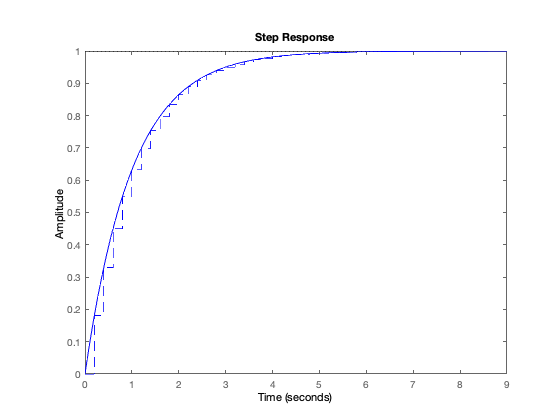

In [7]:
step(Gs,'-',Gz_zoh,'--')

### Approximation by numerical-integration

Also known as the *bilinear transform* or *Tustin equivalent*

In [8]:
Gz_tustin = c2d(Gs, Ts, 'tustin')


Gz_tustin =
 
  0.09091 z + 0.09091
  -------------------
      z - 0.8182
 
Sample time: 0.2 seconds
Discrete-time transfer function.



Plot Result

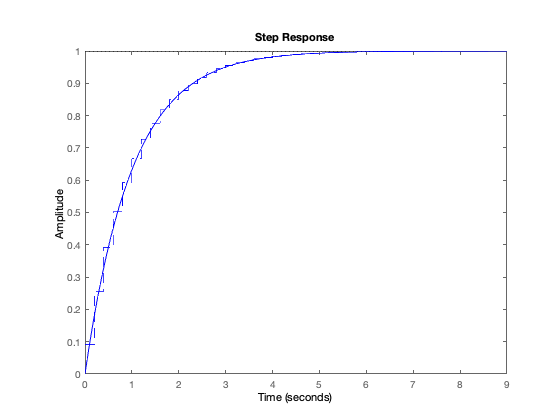

In [9]:
step(Gs,'-',Gz_tustin,'--')

#### Matched pole-zero mapping

In [10]:
Gz_mpz = c2d(Gs, Ts, 'matched')


Gz_mpz =
 
    0.1813
  ----------
  z - 0.8187
 
Sample time: 0.2 seconds
Discrete-time transfer function.



Plot result

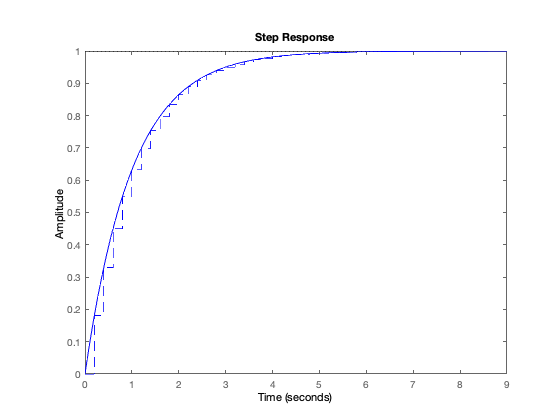

In [11]:
step(Gs,'-',Gz_mpz,'--')

#### Other supported equivalents?

In [12]:
help c2d

 C2D  Converts continuous-time dynamic system to discrete time.
 
    SYSD = C2D(SYSC,TS,METHOD) computes a discrete-time model SYSD with
    sample time TS that approximates the continuous-time model SYSC.
    The string METHOD selects the discretization method among the following:
       'zoh'           Zero-order hold on the inputs
       'foh'           Linear interpolation of inputs
       'impulse'       Impulse-invariant discretization
       'tustin'        Bilinear (Tustin) approximation.
       'matched'       Matched pole-zero method (for SISO systems only).
       'least-squares' Least-squares minimization of the error between
                       frequency responses of the continuous and discrete
                       systems (for SISO systems only).
       'damped'        Damped Tustin approximation based on TRBDF2 formula
                       (sparse models only).
    The default is 'zoh' when METHOD is omitted. The sample time TS should
    be specified in the time